In [1]:
import sys
sys.path.append("..")

from data_utils import SCPDataSet, stratified_split
from data_utils import Sm2Smiles, Smiles2Mol, Mol2Morgan, Type2OneHot
from train import train, loss_fn
from model import BasicModel2

import torch
from torch.optim import Adam
from torch.utils.data import DataLoader

import pandas as pd

: 

In [ ]:
de_train = pd.read_parquet("../data/de_train.parquet")

In [ ]:
cell_types = list(de_train["cell_type"])
train_index, val_index = stratified_split(cell_types, 0.25, 42)

In [ ]:
train_df = de_train.iloc[train_index]
val_df = de_train.iloc[val_index]

In [ ]:
train_dataset = SCPDataSet(train_df)
val_dataset = SCPDataSet(val_df)
train_dataloader = DataLoader(train_dataset, 32)
val_dataloader = DataLoader(val_dataset, 32)

In [ ]:
model = BasicModel2(2048, [100, 30], len(de_train.columns)-5)

In [ ]:
import os
os.chdir("..")

In [ ]:
sm_smiles_df = pd.read_csv("config/sm_smiles.csv")
sm_smiles_dict = sm_smiles_df.set_index("sm_name").to_dict()["SMILES"]
ctypes = de_train['cell_type'].unique()
mtypes = de_train['sm_name'].unique()

In [ ]:
train_all, val_all = [], []

In [ ]:
args = {
    "lr": 0.001,
    "epochs": 20,
    "mol_transform": [Type2OneHot(mtypes)],
    "cell_transform": [Type2OneHot(ctypes)]
}
optimizer = Adam(model.parameters(), lr=args["lr"], weight_decay=1e-5)
train_loss, val_loss = train(train_dataloader, val_dataloader, model, args, loss_fn, optimizer)

cuda:0


100%|██████████| 20/20 [00:44<00:00,  2.24s/it]


In [ ]:
train_all.append(train_loss)
val_all.append(val_loss)

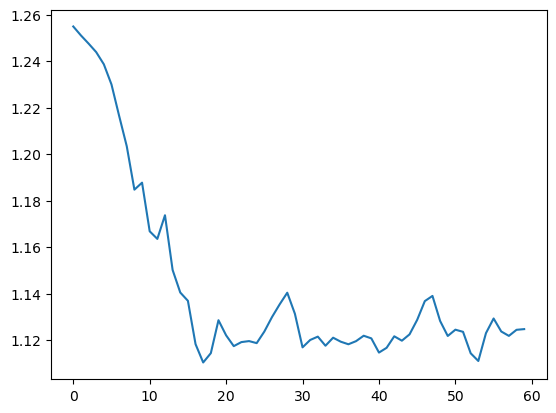

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sum(val_all, []))
# plt.plot(val_all)

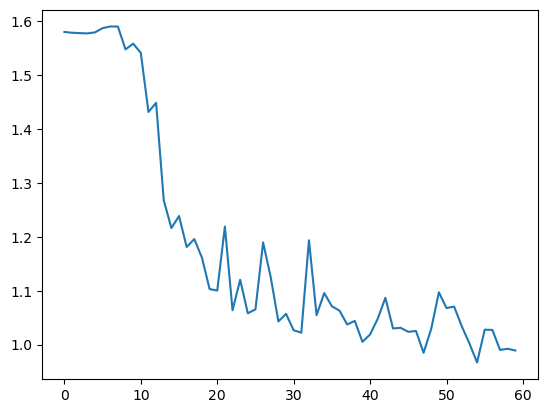

In [ ]:
plt.plot(sum(train_all, []))